In [53]:
import pandas as pd
import xarray as xr
import seaborn as sns
import glob
import pyorc
import numpy as np
import matplotlib.pyplot as plt

In [47]:
vector_files = [f for f in glob.glob('CLAHE/results/*.nc')]
dfs = []

for file in vector_files:
    ds = xr.open_dataset(file)

    ds.velocimetry.mask.corr(inplace=True)
    ds.velocimetry.mask.minmax(inplace=True)
    ds.velocimetry.mask.rolling(inplace=True)
    ds.velocimetry.mask.outliers(inplace=True)
    ds.velocimetry.mask.variance(inplace=True)
    ds.velocimetry.mask.angle(angle_tolerance=0.5*np.pi)
    ds.velocimetry.mask.count(inplace=True)
    ds.velocimetry.mask.window_mean(wdw=2, inplace=True, tolerance=0.5, reduce_time=True)

    ds = ds.mean(dim="time", keep_attrs=True)

    df = ds.to_dataframe().reset_index()
    df['datetime'] = file.rsplit('_', maxsplit=1)[0].split('_', maxsplit=2)[-1]
    
    clahe = file.rsplit('.', maxsplit=1)[0].split('#')
    df['clahe_id'] = f"{clahe[1]}{clahe[2]}"
    df['clahe_clip'] = clahe[1].split('=')[-1]
    df['clahe_tile'] = clahe[2].split('=')[-1]

    dfs.append(df)

    ds.close()

df = pd.concat(dfs)
df.to_csv(f'clahe.csv', index=False)

/home/waterlab/anaconda3/envs/pyorc/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/waterlab/anaconda3/envs/pyorc/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/waterlab/anaconda3/envs/pyorc/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/waterlab/anaconda3/envs/pyorc/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/waterlab/anaconda3/envs/pyorc/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanv

In [48]:
df = pd.read_csv('clahe.csv')
df.datetime = pd.to_datetime(df.datetime, format='%Y-%m-%d_%H-%M-%S')
df

,y,x,v_x,v_y,s2n,corr,xp,yp,xs,ys,datetime,clahe_id,clahe_clip,clahe_tile
0,9.645,0.125,NaN,NaN,NaN,NaN,-516.84546,-125.344240,4.849573,4.702055,2024-07-01 09:08:21,clip=4tile=24,4.0,24
1,9.645,0.255,NaN,NaN,NaN,NaN,-468.76276,-80.596310,4.856762,4.831856,2024-07-01 09:08:21,clip=4tile=24,4.0,24
2,9.645,0.385,NaN,NaN,NaN,NaN,-423.15726,-38.153687,4.863951,4.961657,2024-07-01 09:08:21,clip=4tile=24,4.0,24
3,9.645,0.515,NaN,NaN,NaN,NaN,-379.84232,2.157104,4.871140,5.091458,2024-07-01 09:08:21,clip=4tile=24,4.0,24
4,9.645,0.645,NaN,NaN,NaN,NaN,-338.64963,40.492920,4.878329,5.221259,2024-07-01 09:08:21,clip=4tile=24,4.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717943,0.155,19.495,NaN,NaN,NaN,NaN,1667.14120,1291.775900,15.396224,23.517611,2024-07-01 09:08:21,clip=1tile=32,1.0,32
717944,0.155,19.625,NaN,NaN,NaN,NaN,1665.15280,1293.273400,15.403413,23.647412,2024-07-01 09:08:21,clip=1tile=32,1.0,32
717945,0.155,19.755,NaN,NaN,NaN,NaN,1663.18600,1294.754600,15.410602,23.777213,2024-07-01 09:08:21,clip=1tile=32,1.0,32
717946,0.155,19.885,NaN,NaN,NaN,NaN,1661.24020,1296.220100,15.417791,23.907014,2024-07-01 09:08:21,clip=1tile=32,1.0,32


In [50]:
df.v_x.unique()

array([       nan, 0.53045455, 0.50958333, ..., 0.58035088, 0.4955102 ,
       0.59541667])

<Axes: xlabel='clahe_clip', ylabel='v_x'>

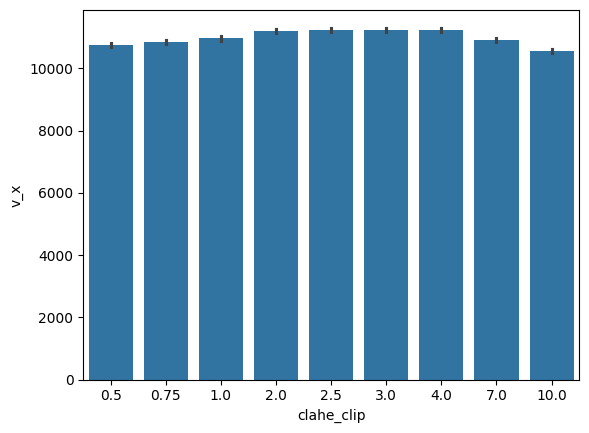

In [51]:
sns.barplot(
    data=df,
    x='clahe_clip',
    y='v_x',
    estimator='sum'
)

<Axes: xlabel='clahe_tile', ylabel='v_x'>

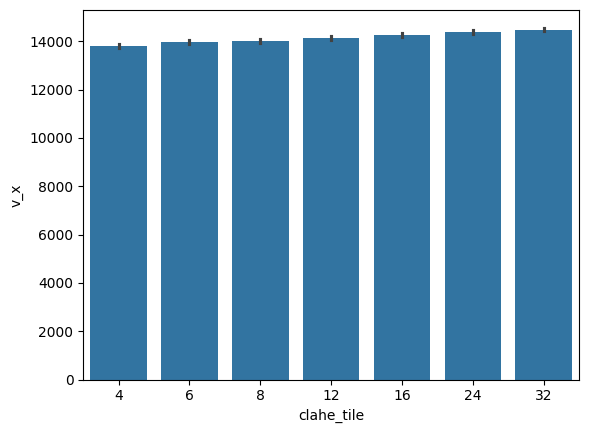

In [52]:
sns.barplot(
    data=df,
    x='clahe_tile',
    y='v_x',
    estimator='sum'
)

<Axes: xlabel='clahe_id', ylabel='v_x'>

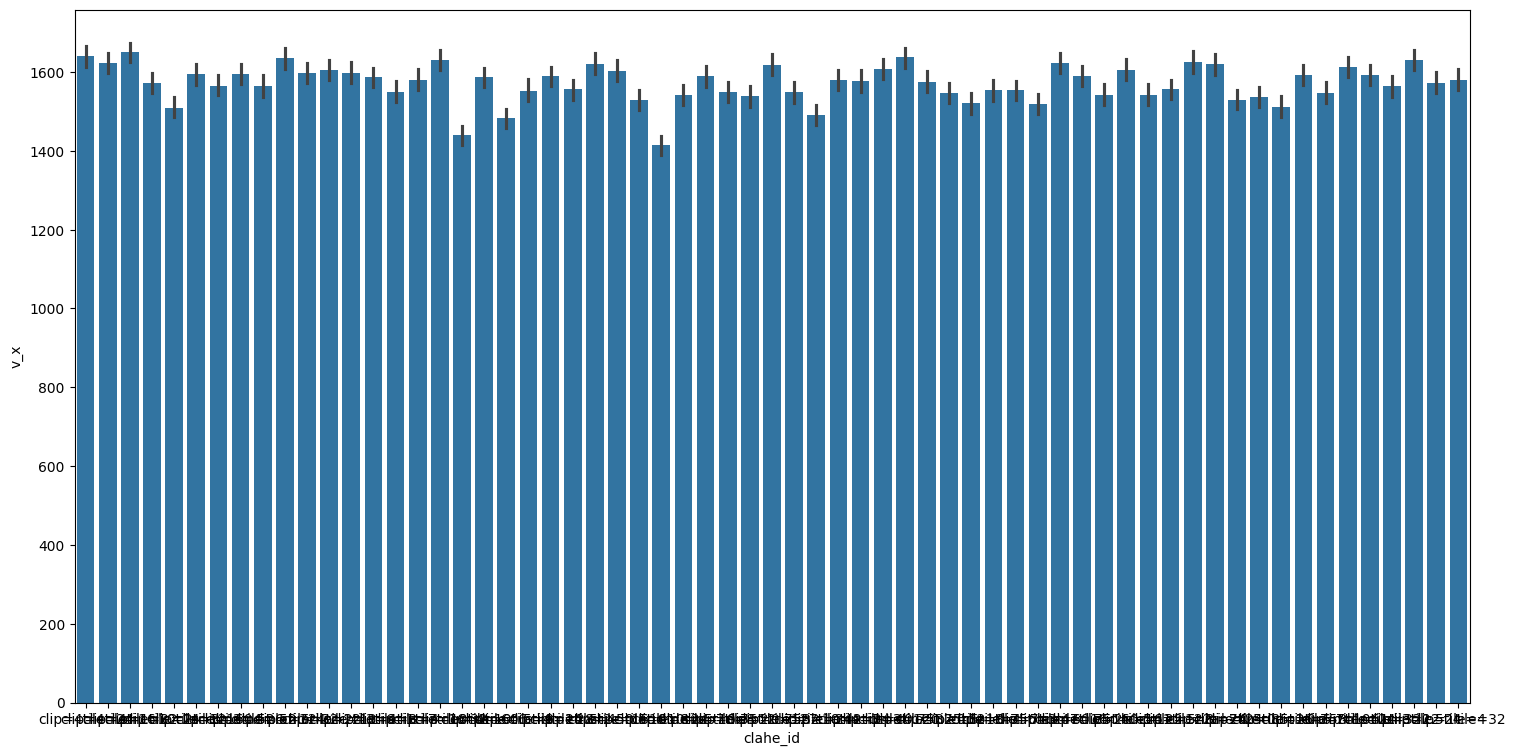

In [56]:
plt.figure(figsize=(18, 9))

sns.barplot(
    data=df,
    x='clahe_id',
    y='v_x',
    estimator='sum'
)

In [60]:
M = -1
M_id = ''

for id in df.clahe_id.unique():
    count = len(df[(df.clahe_id == id) & (~df.v_x.isna())])
    if count > M:
        M = count
        M_id = id

print('max:', M)
print('id:', id)

max: 2333
id: clip=1tile=32


In [70]:
print(len(df.clahe_id.unique()), '\n')

i = 0
for id in df.clahe_id.unique():
    count = len(df[(df.clahe_id == id) & (~df.v_x.isna())])
    if count > 2300:
        i += 1
        print('count:', count)
        print('id:', id)
        print()
print(i)

63 

count: 2314
id: clip=4tile=24

count: 2333
id: clip=4tile=32

count: 2317
id: clip=2.5tile=32

count: 2308
id: clip=3tile=32

count: 2305
id: clip=2.5tile=24

5
